<a href="https://colab.research.google.com/github/andreacohen7/food-sales-predictions/blob/main/Food_Sales_Predictions_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions
- Andrea Cohen
- 12.22.22

## Task 1:
To help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Task 2:
To help the retailer by using machine learning to make predictions about future sales based on the data provided.

## Data Dictionary:

Variable Name	| Description
---| ---
Item_Identifier |	Unique product ID
Item_Weight |	Weight of product
Item_Fat_Content |	Whether the product is low fat or regular
Item_Visibility |	The percentage of total display area of all products in a store allocated to the particular product
Item_Type |	The category to which the product belongs
Item_MRP |	Maximum Retail Price (list price) of the product
Outlet_Identifier |	Unique store ID
Outlet_Establishment_Year |	The year in which store was established
Outlet_Size |	The size of the store in terms of ground area covered
Outlet_Location_Type |	The type of area in which the store is located
Outlet_Type |	Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales |	Sales of the product in the particular store. This is the target variable to be predicted.


### Preliminary Steps

In [1]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import set_config
set_config(display='diagram')

### Load and inspect the data.

In [3]:
#load the dataset
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
display(df.head())
display(df.info())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [4]:
#how many rows and columns?
df.shape

(8523, 12)

  - There are 8523 rows and 12 columns.

In [5]:
#what are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

  - Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, and Outlet_Type are all datatype object. 
  - Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet Sales are all datatype float64. 
  - Item_Establishment_Year is datatype int64.

In [6]:
display(df.describe(include='number'))
display(df.describe(exclude='number'))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### Clean the data

In [7]:
# make a copy of original df
clean_df = df.copy()

In [8]:
#are there any duplicates? if so drop any duplicates
display(clean_df.duplicated())
clean_df.duplicated().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

0

  - There are 0 duplicates.

In [9]:
#identify missing values
clean_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

  - There are 1463 missing values in Item_Weight, and there are 2410 missing values in Outlet_Size.

In [10]:
#decide on how to address the missing values and do it
display(clean_df['Item_Weight'].nunique())
mean_weight = clean_df['Item_Weight'].mean().round(2)
clean_df['Item_Weight'].fillna(mean_weight, inplace=True)
display(clean_df.isna().sum())

415

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- For the Column 'Item_Weight':
  - Dropping rows was not a good option because 17% of rows are missing data--too many (>2%) to just eliminate.
  - Dropping columns was not a good option because the weight of the item might be an important property for predicting the sales of that item. Also, <50% of the data are missing, too little to just eliminate.
  - Creating a new category was not a good option because the data are type float instead of type object.
  - Imputing missing values is a great option because the average (mean) value would likely be closest to the correct value that is missing.

In [11]:
display(clean_df['Outlet_Size'].nunique())
display(clean_df['Outlet_Size'].value_counts())
clean_df['Outlet_Size'].fillna('Missing', inplace=True)
display(clean_df['Outlet_Size'].value_counts())
display(clean_df.isna().sum())

3

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- For the column 'Outlet_Size':
  - Dropping rows was not a good option because 28% of rows are missing data--too many (>2%) to just eliminate.
  - Dropping columns was not a good option because the size of the outlet might be an important property for predicting sales. Also, <50% of the data are missing, too little to just eliminate.
  - Imputing missing values was not a good option because the data are type object instead of type float or int.
  - Creating a new category is a good option because the information is categorical, and there might be a pattern to the missing data.

In [12]:
#confirm that there are no missing values
display(clean_df.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

  - There are no more missing values.

In [13]:
#find and fix any inconsistent categories of data
dtypes = clean_df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
  print(f'Column= {col}')
  print(clean_df[col].value_counts())
  print(' ')

Column= Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
 
Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
 
Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
 
Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018  

  - From the data dictionary, we know that Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location Type, and Outlet_Type should be categorical data types.
  - For Item_Fat_Content, Low Fat, LF, and low fat are all probably the same category.
  - Also Regular and reg are probably the same category.
  - For the rest of the categorical columns, all data categories appear distinct.

In [14]:
clean_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
print('Column = Item_Fat_Content')
display(clean_df['Item_Fat_Content'].value_counts())

Column = Item_Fat_Content


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

  - There are no more inconsistent categories of data.

In [15]:
#for any numerical columns obtain the summary statistics of each (min, max, mean)
clean_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.860000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


  - The min item weight is 4.56, the max item weight is 21.35, and the mean item weight is 12.86.
  - The min item visibility is 0.00, the max item visibility is .33, and the mean item visibility is .07.
  - The min item MRP is 31.29, the max item MRP is 266.89, and the mean item MRP is 140.99.
  - The min outlet establishment year is 1985, the max outlet establishment year is 2009, and the mean outlet establishment year is 1997.83.
  - The min item outlet sales is 33.29, the max item outlet sales is 13086.96, and the mean item outlet sales is 2181.29.

### Exploratory Visuals

#### Histogram to view the distributions of various features


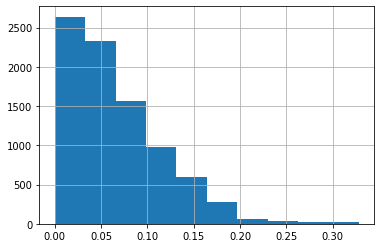

In [16]:
clean_df['Item_Visibility'].hist();

  - The item visibility has a right-skewed distribution, with the most frequent observations at lower values--most of the items in the store have a low visibility.

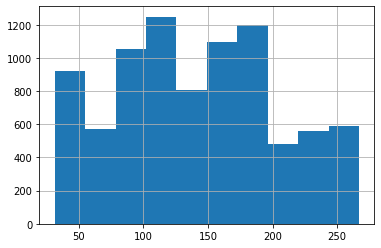

In [17]:
clean_df['Item_MRP'].hist();

  - There is no particular pattern of frequency distribution for the maximum price of an item.

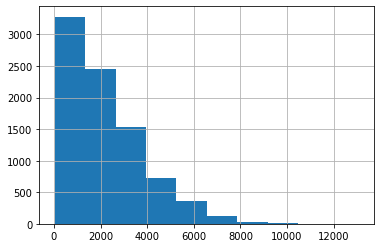

In [18]:
clean_df['Item_Outlet_Sales'].hist();

  - The sales data is right-skewed, with more frequent observations at lower values--most of the stores have low sales.

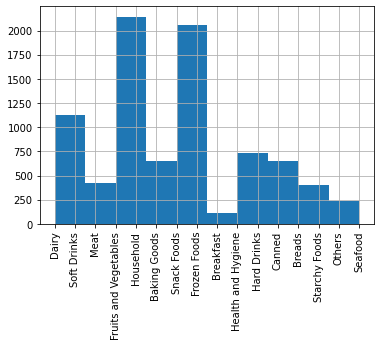

In [19]:
clean_df['Item_Type'].hist();
plt.xticks(rotation = 90);

  - Most of the data points correspond to household and frozen foods.

#### Boxplot to view statistical summaries of various features in the dataset.

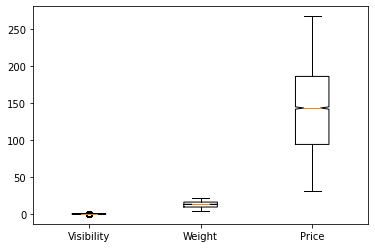

In [20]:
visibility = clean_df['Item_Visibility'].values
weight = clean_df['Item_Weight'].values
price = clean_df['Item_MRP'].values
sales = clean_df['Item_Outlet_Sales'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([visibility, weight, price], notch = True, labels = ['Visibility', 'Weight', 'Price']);

  - The range of values for price is significantly larger than the range of values for visibility and for weight.

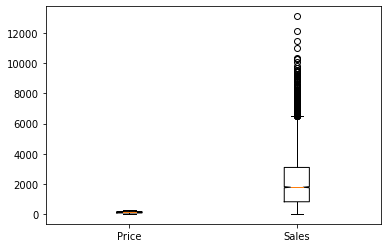

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([price, sales], notch = True, labels = ['Price', 'Sales']);

  - The range of values for sales is significantly larger than the range of values for price.

#### Heatmap of the correlation between features.

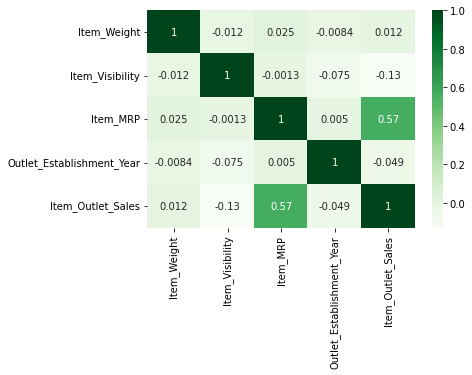

In [22]:
corr = clean_df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

  - Most of the correlation coefficients show no correlation, except that there is a moderate correlation between the maximum price of an item and the sales of that item.

### Explanatory Visuals

Do higher prices increase the overall sales at the outlet?

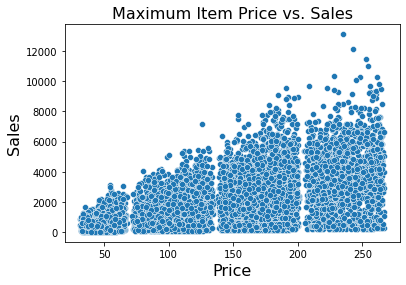

In [23]:
ax = sns.scatterplot(data = clean_df, x = 'Item_MRP', y = 'Item_Outlet_Sales')
plt.xlabel('Price', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.title('Maximum Item Price vs. Sales', fontsize=16);

  - Interpretation:  
  This scatterplot shows a positive correlation between the maximum price of an item and the overall outlet sales. Outlets with higher maximum prices tend to have higher overall sales. However, we can't assume that higher prices cause higher sales, just because they are correlated.

Does the outlet size, the outlet location, or the the outlet type affect the sales?

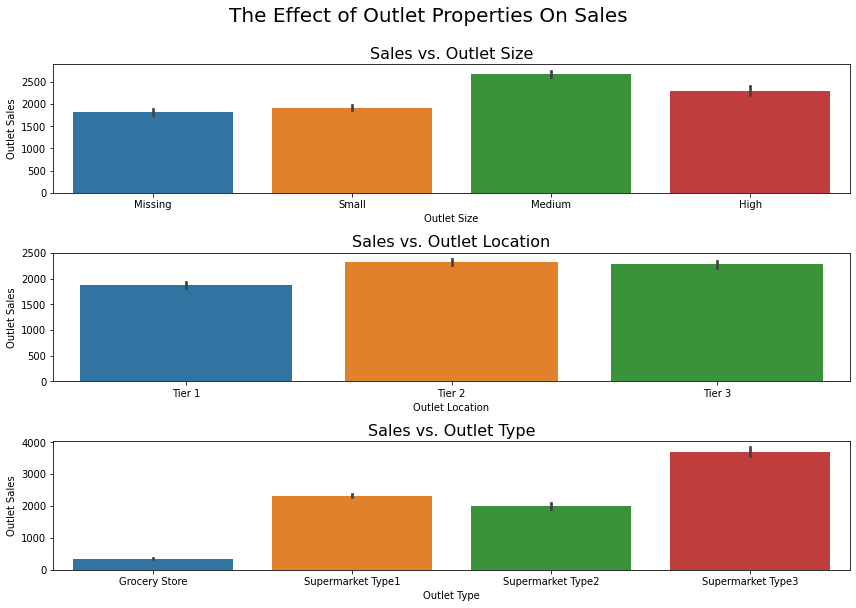

In [24]:
clean_df2 = clean_df.rename(columns={'Outlet_Size':'Outlet Size',
                                'Outlet_Location_Type':'Outlet Location',
                                'Outlet_Type':'Outlet Type',
                                'Item_Outlet_Sales':'Outlet Sales'})
label_order_list = ['Missing', 'Small', 'Medium', 'High']
label_order_list2 = ['Tier 1', 'Tier 2', 'Tier 3']
label_order_list3 = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
fig, axes = plt.subplots(nrows = 3, figsize = (12, 8));
sns.barplot(data = clean_df2, x = 'Outlet Size', y = 'Outlet Sales', order = label_order_list, ax = axes[0]);
axes[0].set_title('Sales vs. Outlet Size', fontsize = 16);
sns.barplot(data = clean_df2, x = 'Outlet Location', y = 'Outlet Sales', order = label_order_list2, ax = axes[1]);
axes[1].set_title('Sales vs. Outlet Location', fontsize = 16);
sns.barplot(data = clean_df2, x = 'Outlet Type', y = 'Outlet Sales', order = label_order_list3, ax = axes[2]);
axes[2].set_title('Sales vs. Outlet Type', fontsize = 16);
fig.suptitle('The Effect of Outlet Properties On Sales', fontsize = 20, y = 1.05);
fig.tight_layout();

  - Interpretation:  
  The outlet properties make a difference in overall sales. First, medium-sized stores have the highest sales, and small-sized stores have the lowest sales. Second, tier 2 and 3 locations also have the highest sales. Finally, supermarkets have higher sales than grocery stores. This might indicate that medium and large stores, tier 2 and 3 stores, and supermarkets use more effective sales strategies.

Does the display of the item (item visibility) affect the sales?

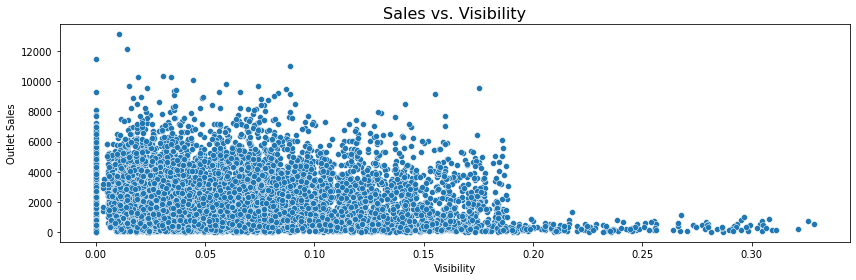

In [25]:
clean_df3 = clean_df.rename(columns={'Item_Visibility':'Visibility',
                         'Item_Outlet_Sales':'Outlet Sales'})
fig, axes = plt.subplots(figsize = (12, 4));
sns.scatterplot(data = clean_df3, x = 'Visibility', y = 'Outlet Sales');
plt.title('Sales vs. Visibility', fontsize = 16);
fig.tight_layout();

  - Interpretation:  
  The visibility of an item makes a difference in overall sales. Items with lower visibility scores have higher sales--this might indicate that lower visibility scores increase sales.

Recommendations:   
The retailer should increase use of the effective sales strategies (including item visibility and maximum item price) used by medium and large stores, tier 2 and 3 stores, and supermarkets. The retailer should also recognize the room for further growth in small stores, tier 1 locations, and grocery stores--they might need to use different sales strategies in these outlets than in medium and large stores/tier 2 and 3 stores/supermarkets.

### Inspect and prepare the data for machine learning

In [26]:
# make a copy of original df
ml_df = df.copy()

In [27]:
display(ml_df.head())
display(ml_df.info())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

  - There are missing data in float64 columns and object type columns. There are no missing data in int64 columns.

In [28]:
dtypes = ml_df.dtypes
str_cols = dtypes[dtypes=='object'].index
for col in str_cols:
  print(f'Column= {col}')
  print(ml_df[col].value_counts())
  print('\n')

Column= Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Column= Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Column= Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Column= Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018  

  - The column 'Outlet_Size' has ordinal categorical data.
  - The column 'Item_Fat_Content' has inconsistencies in the data categories.

In [29]:
ml_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


  - The numeric data columns have different scales.

In [30]:
# drop unnecessary columns
ml_df = ml_df.drop(columns = ['Item_Identifier', 'Outlet_Identifier'])
ml_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

  - According to the data dictionary, the Item Identifier is a unique product ID and the Outlet Identifier is a unique store ID.  This information will not help with making predictions.


In [31]:
# drop duplicates
display(ml_df.duplicated())
ml_df.duplicated().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

0

  - There are 0 duplicates.

In [32]:
# Fix inconsistencies in categorical data
#There are inconsistencies in the Item_Fat_Content column
#Low Fat, LF, and low fat are probably the same category
#Regular, reg are probably the same category
ml_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
print('Column = Item_Fat_Content')
display(ml_df['Item_Fat_Content'].value_counts())

Column = Item_Fat_Content


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [33]:
#ordinal encoding
ml_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [34]:
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
ml_df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
ml_df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

### Split the data

  - Assign the "Item_Outlet_Sales" column as the target and the rest of the relevant variables as the features matrix.

In [35]:
#assign X and y
y = ml_df['Item_Outlet_Sales']
X = ml_df.drop(columns = ['Item_Outlet_Sales'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
display(len(X_train))
display(len(X_test))
display(len(y_train))
display(len(y_test))

6392

2131

6392

2131

### Linear Regression Model

#### Create a preprocessing object 

  - Mean imputation will be used in the float columns (because the average value would likely be closest to the correct value that is missing).
  - Constant imputation will be used in the object columns (because there might be a pattern to the missing categorical data).
  - Then the numeric data will be scaled and the categorical (object) columns will be one-hot encoded.

In [37]:
#create a columntransformer for preprocessing
#prepare the preprocessing object but do not preprocess the data yet--the data will be preprocessed inside the model pipeline
#instantiate the transformers
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy = 'mean')
constant_imputer = SimpleImputer(strategy = 'constant', fill_value = 'Missing')
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
#prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(constant_imputer, ohe)
#create columnselectors for the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#combine the pipelines and columnselectors into tuples for the columntransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)
#create the preprocessing columntransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f24b00e0eb0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f24b00e0d90>)])

#### Create a model pipeline

In [38]:
#instantiate a linear regression model
linreg = LinearRegression()
#combine the preprocessing columntransformer and the linear regression model in a pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f24b00e0eb0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f24b00e0d90>)])),
                ('linearregression', LinearRegression())])

#### Fit the model pipeline on the training data and make predictions

In [39]:
#fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)
#make predictions using the training and testing data
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)

#### Evaluate the performance of the model based on R^2

In [40]:
#evaluate the model
train_r2 = r2_score(y_train, training_predictions)
test_r2 = r2_score(y_test, test_predictions)
print(f'Linear Regression Model Training R2: {train_r2}')
print(f'Linear Regression Model Testing R2: {test_r2}')

Linear Regression Model Training R2: 0.5597456799341995
Linear Regression Model Testing R2: 0.5665635905949876


  - The linear regression model used the features to explain 56% of the variation in the target for the training data.
  - However, the linear regression model used the features to explain 57% of the variation in the target for the testing data.


#### Evaluate the performance of the model based on RMSE

In [41]:
#evaluate the model
train_MAE = mean_absolute_error(y_train, training_predictions)
test_MAE = mean_absolute_error(y_test, test_predictions)
print(train_MAE)
print(test_MAE)
train_MSE = mean_squared_error(y_train, training_predictions)
test_MSE = mean_squared_error(y_test, test_predictions)
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
print(f'Linear Regression Model Training RMSE: {train_RMSE}')
print(f'Linear Regression Model Testing RMSE: {test_RMSE}')

847.570261764706
804.6181711872362
Linear Regression Model Training RMSE: 1141.4522149267548
Linear Regression Model Testing RMSE: 1093.545247923878


  - The RMSE is larger than the MAE--while the model is making an average error of 804.62 on the test data, it is making some larger errors.
  - Additionally, the RMSE is larger on the training data than on the test data--the model is overfitting.

### Regression Tree Model

#### Preprocessing

  - Mean imputation will be used in the float columns (because the average value would likely be closest to the correct value that is missing).
  - Constant imputation will be used in the object columns (because there might be a pattern to the missing categorical data).
  - Then the categorical (object) columns will be one-hot encoded.

In [42]:
#create a columntransformer for preprocessing
#prepare the preprocessing object but do not preprocess the data yet--the data will be preprocessed inside the model pipeline
#instantiate the transformers
mean_imputer = SimpleImputer(strategy = 'mean')
constant_imputer = SimpleImputer(strategy = 'constant', fill_value = 'Missing')
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
#prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(mean_imputer)
cat_pipe = make_pipeline(constant_imputer, ohe)
#create columnselectors for the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#combine the pipelines and columnselectors into tuples for the columntransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)
#create the preprocessing columntransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f24b0066670>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f24b0066700>)])

#### Create a model pipeline

In [43]:
#instantiate a regression tree model
dec_tree = DecisionTreeRegressor(random_state = 42)
#combine the preprocessing columntransformer and the linear regression model in a pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f24b0066670>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f24b0066700>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

#### Fit the model pipeline on the training data and make predictions

In [44]:
#fit the model pipeline on the training data
dec_tree_pipe.fit(X_train, y_train)
#make predictions using the training and testing data
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)

#### Evaluate the default model

In [45]:
train_score = dec_tree_pipe.score(X_train, y_train)
test_score = dec_tree_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.18315478822009812


  - The default decision tree had a much higher R^2 score on the training data than it did on the test data—the model is overfitting.

#### Tune the model to optimize performance on the test set.

In [46]:
#determine the depth of the default tree
dec_tree.get_depth()

40

  - The default tree had a depth of 40.

In [47]:
#use a for loop to try many values at once and compare them
depths = list(range(2, 40))
scores = pd.DataFrame(index=depths, columns = ['Test Score', 'Train Score'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
  dec_tree_pipe.fit(X_train, y_train)
  train_score = dec_tree_pipe.score(X_train, y_train)
  test_score = dec_tree_pipe.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = train_score
  scores.loc[depth, 'Test Score'] = test_score
scores.head()

,Test Score,Train Score
2,0.433778,0.431641
3,0.524222,0.524218
4,0.584005,0.582625
5,0.59471,0.60394
6,0.582587,0.615072


In [48]:
#Check best score for the model by sorting dataframe to find the depth for the best score
#looking for the index of the best test score
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582587,0.615072
7,0.576841,0.626454
8,0.560709,0.642714


  - The optimal max_depth is 5.

In [49]:
# run the model with the optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5_pipe = make_pipeline(preprocessor, dec_tree_5)
dec_tree_5_pipe.fit(X_train, y_train)
train_preds = dec_tree_5_pipe.predict(X_train)
test_preds = dec_tree_5_pipe.predict(X_test)
train_5_score = dec_tree_5_pipe.score(X_train, y_train)
test_5_score = dec_tree_5_pipe.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322958
0.5947099753159972


  - The r2 of the final model is .60 on the training set, and the r2 of the final model is .59 on the test set.
  - The training and test results have moved closer to each other (a sign that overfitting was reduced). Most importantly, the testing score is higher.

#### Evaluate the performance of the model based on R^2

In [50]:
#evaluate the model
print(f'Regression Tree Model Training R2: {train_5_score}')
print(f'Regression Tree Model Testing R2: {test_5_score}')

Regression Tree Model Training R2: 0.6039397477322958
Regression Tree Model Testing R2: 0.5947099753159972


  - The regression tree model used the features to explain 60% of the variation in the target for the training data.
  - The regression tree model used the features to explain 59% of the variation in the target for the testing data.

#### Evaluate the performance of the model based on RMSE

In [51]:
#evaluate the model
train_MAE = mean_absolute_error(y_train, train_preds)
test_MAE = mean_absolute_error(y_test, test_preds)
print(train_MAE)
print(test_MAE)
train_MSE = mean_squared_error(y_train, train_preds)
test_MSE = mean_squared_error(y_test, test_preds)
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
print(f'Regression Tree Model Training RMSE: {train_RMSE}')
print(f'Regression Tree Model Testing RMSE: {test_RMSE}')

762.6101695559578
738.3173097797824
Regression Tree Model Training RMSE: 1082.6461900869947
Regression Tree Model Testing RMSE: 1057.4431299496734


  - The RMSE is larger than the MAE--while the model is making an average error of 738.32 on the test data, it is making some larger errors.
  - Additionally, the RMSE is larger on the training data than on the test data--the model is overfitting.

## Overall, which model do you recommend?
- Justify your recommendation.

In [52]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics
def evaluation_model(pipe, model_name='', 
                     x_train='X_train', x_test='X_test'):
  # Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  # Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [53]:
evaluation_model(pipe=linreg_pipe, model_name='Linear Regression Model', x_train=X_train, x_test=X_test)
evaluation_model(pipe=dec_tree_5_pipe, model_name='Regression Tree Model', x_train=X_train, x_test=X_test)

Linear Regression Model Train Scores
MAE: 847.5703 
MSE: 1,302,913.1590 
RMSE: 1,141.4522 
R2: 0.5597

Linear Regression Model Test Scores
MAE: 804.6182 
MSE: 1,195,841.2093 
RMSE: 1,093.5452 
R2: 0.5666

Regression Tree Model Train Scores
MAE: 762.6102 
MSE: 1,172,122.7729 
RMSE: 1,082.6462 
R2: 0.6039

Regression Tree Model Test Scores
MAE: 738.3173 
MSE: 1,118,185.9731 
RMSE: 1,057.4431 
R2: 0.5947



  - Good performance on the testing data is the most important consideration for choosing a model--therefore the two models will be compared based on their Test Scores.
  - The Regression Tree Model had the lowest MAE and RMSE for the testing data.  The Regression Tree Model also had the highest R2 score.
  - ***The Regression Tree Model was the best model, based on the regression metrics for the testing data.***

  - Mean Absolute Error:  
  The average that the Regression Tree Model was off on its predictions was 762.61 for the training set and 738.32 for the test set. Since the average of the sales was 2181.29, the model was off by about 34% on average.  
  - Root Mean Squared Error:
  The RMSE is larger than MAE calculated previously. This tells us that while the Regression Tree Model is making an average error of 738.32 on the test data it is making some larger errors.
  - R-Squared Score:  
  The Regression Tree Model can account for about 59% of the variation in sales using the features (item identifier, item weight, item fat content, item visibility, item type, item maximum price, outlet identifier, outlet establishment year, outlet size, outlet location type, and outlet type).  Given new data for the features (item identifier, item weight, item fat content, item visibility, item type, item maximum price, outlet identifier, outlet establishment year, outlet size, outlet location type, and outlet type), the Regression Tree Model can be applied in order to predict the future sales. The predictions might be off by about 34%, with some larger errors--however, the model would account for about 59% of the variation in sales.